In [ ]:
import numpy as np
import os

saved_folder = "saved_data"
num_episodes = 1016
best_mean_thrpt = -np.inf
best_episode_index = -1

# Store mean throughput for each episode if needed
mean_thrpts = []

for episode_idx in range(1, num_episodes + 1):
    try:
        episode_tag = f'Episode_{episode_idx}'
        filepath = f'{saved_folder}/{episode_tag}_Thrpt.npy'
        if os.path.exists(filepath):
            thrpt = np.load(filepath)  # Shape (20, 61)
            mean_thrpt_first_10_users = np.mean(thrpt[:10])  # Flatten and mean
            mean_thrpts.append(mean_thrpt_first_10_users)

            if mean_thrpt_first_10_users > best_mean_thrpt:
                best_mean_thrpt = mean_thrpt_first_10_users
                best_episode_index = episode_idx
        else:
            print(f"[Warning] Missing file: {filepath}")

    except Exception as e:
        print(f"[Error] Episode {episode_idx}: {str(e)}")

print(f"\n✅ Best episode index (1-based): {best_episode_index}")
print(f"📈 Best mean throughput (first 10 users): {best_mean_thrpt:.4f} Mbps")


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

saved_folder = "saved_data"
num_episodes = 1016

best_mean_thrpt = -np.inf
best_episode_index = -1

# Step 1: Find the best episode
for episode_idx in range(1, num_episodes + 1):
    thrpt_path = f'{saved_folder}/Episode_{episode_idx}_Thrpt.npy'
    if os.path.exists(thrpt_path):
        thrpt = np.load(thrpt_path)  # (20, 61)
        mean_thrpt_first_10 = np.mean(thrpt[:10])
        if mean_thrpt_first_10 > best_mean_thrpt:
            best_mean_thrpt = mean_thrpt_first_10
            best_episode_index = episode_idx

print(f"✅ Best Episode: {best_episode_index} with mean throughput (first 10 users): {best_mean_thrpt:.4f} Mbps")

# Step 2: Load baseline data
Thrpt_baseline = np.load(f'{saved_folder}/Baseline_Thrpt.npy')     # (20, 61)
SINR_baseline = np.load(f'{saved_folder}/Baseline_SINR.npy')       # (20, 61)
Intf_baseline = np.load(f'{saved_folder}/Baseline_Intf.npy')       # (20, 61)

# Step 3: Load best episode data
Thrpt_best = np.load(f'{saved_folder}/Episode_{best_episode_index}_Thrpt.npy')
SINR_best = np.load(f'{saved_folder}/Episode_{best_episode_index}_SINR.npy')
Intf_best = np.load(f'{saved_folder}/Episode_{best_episode_index}_Intf.npy')

# Step 4: Compute mean across timesteps (axis=1) for each user
mean_thrpt_baseline = np.mean(Thrpt_baseline, axis=1)
mean_thrpt_best = np.mean(Thrpt_best, axis=1)

mean_sinr_baseline = np.mean(SINR_baseline, axis=1)
mean_sinr_best = np.mean(SINR_best, axis=1)

mean_intf_baseline = np.mean(Intf_baseline, axis=1)
mean_intf_best = np.mean(Intf_best, axis=1)

users = np.arange(1, 21)

# Step 5: Plot all three metrics
plt.figure(figsize=(18, 5))

# Plot Throughput
plt.subplot(1, 3, 1)
plt.plot(users, mean_thrpt_baseline, label='Baseline', marker='o')
plt.plot(users, mean_thrpt_best, label=f'Episode {best_episode_index}', marker='x')
plt.title('Mean Throughput per User')
plt.xlabel('User Index')
plt.ylabel('Throughput (Mbps)')
plt.legend()
plt.grid(True)

# Plot SINR
plt.subplot(1, 3, 2)
plt.plot(users, mean_sinr_baseline, label='Baseline', marker='o')
plt.plot(users, mean_sinr_best, label=f'Episode {best_episode_index}', marker='x')
plt.title('Mean SINR per User')
plt.xlabel('User Index')
plt.ylabel('SINR (dB)')
plt.legend()
plt.grid(True)

# Plot Interference
plt.subplot(1, 3, 3)
plt.plot(users, mean_intf_baseline, label='Baseline', marker='o')
plt.plot(users, mean_intf_best, label=f'Episode {best_episode_index}', marker='x')
plt.title('Mean Interference per User')
plt.xlabel('User Index')
plt.ylabel('Interference (dB or mW)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
# Folder name
saved_folder = "saved_data"
# Define the dynamic extra_tag for Episode (change this variable to reflect different episodes)
extra_tag_episode = 'Episode_1016'  # Change this to any other episode (e.g., 'Episode_1020')
# extra_tag_episode = 'Episode_723'

# Define the extra_tag for Baseline
extra_tag_baseline = 'Baseline'

# Load the variables for Baseline
SINR_baseline = np.load(f'{saved_folder}/{extra_tag_baseline}_SINR.npy')
Intf_baseline = np.load(f'{saved_folder}/{extra_tag_baseline}_Intf.npy')
SINR_mW_dict_baseline = np.load(f'{saved_folder}/{extra_tag_baseline}_SINR_mW_dict.npy', allow_pickle=True)
Intf_mW_dict_baseline = np.load(f'{saved_folder}/{extra_tag_baseline}_Intf_mW_dict.npy', allow_pickle=True)
Thrpt_baseline = np.load(f'{saved_folder}/{extra_tag_baseline}_Thrpt.npy')

# Load the variables for Episode_1016 (dynamic based on the extra_tag_episode variable)
SINR_episode = np.load(f'{saved_folder}/{extra_tag_episode}_SINR.npy')
Intf_episode = np.load(f'{saved_folder}/{extra_tag_episode}_Intf.npy')
SINR_mW_dict_episode = np.load(f'{saved_folder}/{extra_tag_episode}_SINR_mW_dict.npy', allow_pickle=True)
Intf_mW_dict_episode = np.load(f'{saved_folder}/{extra_tag_episode}_Intf_mW_dict.npy', allow_pickle=True)
Thrpt_episode = np.load(f'{saved_folder}/{extra_tag_episode}_Thrpt.npy')

# Set up the time steps
timesteps = np.arange(1, 62)  # 61 timesteps

# Create 'graphs' folder if it doesn't exist
graphs_folder = 'graphs'
os.makedirs(graphs_folder, exist_ok=True)

# Plot for each user individually and save them
for user in range(SINR_baseline.shape[0]):
    # Create a figure for each user
    
    # Plot SINR for Baseline and the dynamic Episode (Episode_1016 or others)
    plt.figure(figsize=(10, 6))
    plt.plot(timesteps, SINR_baseline[user], label=f'Baseline - User {user + 1}')
    plt.plot(timesteps, SINR_episode[user], label=f'{extra_tag_episode} - User {user + 1}', linestyle='--')
    plt.xlabel('Timestep')
    plt.ylabel('SINR')
    plt.title(f'User {user + 1} - SINR Comparison')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{graphs_folder}/User_{user + 1}_SINR_Comparison.png')
    plt.close()

    # Plot Interference for Baseline and dynamic Episode
    plt.figure(figsize=(10, 6))
    plt.plot(timesteps, Intf_baseline[user], label=f'Baseline - User {user + 1}')
    plt.plot(timesteps, Intf_episode[user], label=f'{extra_tag_episode} - User {user + 1}', linestyle='--')
    plt.xlabel('Timestep')
    plt.ylabel('Interference')
    plt.title(f'User {user + 1} - Interference Comparison')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{graphs_folder}/User_{user + 1}_Interference_Comparison.png')
    plt.close()

    # Plot SINR (mW) for Baseline and dynamic Episode
    plt.figure(figsize=(10, 6))
    plt.plot(timesteps, SINR_mW_dict_baseline[user], label=f'Baseline - User {user + 1}')
    plt.plot(timesteps, SINR_mW_dict_episode[user], label=f'{extra_tag_episode} - User {user + 1}', linestyle='--')
    plt.xlabel('Timestep')
    plt.ylabel('SINR (mW)')
    plt.title(f'User {user + 1} - SINR (mW) Comparison')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{graphs_folder}/User_{user + 1}_SINR_mW_Comparison.png')
    plt.close()

    # Plot Interference (mW) for Baseline and dynamic Episode
    plt.figure(figsize=(10, 6))
    plt.plot(timesteps, Intf_mW_dict_baseline[user], label=f'Baseline - User {user + 1}')
    plt.plot(timesteps, Intf_mW_dict_episode[user], label=f'{extra_tag_episode} - User {user + 1}', linestyle='--')
    plt.xlabel('Timestep')
    plt.ylabel('Interference (mW)')
    plt.title(f'User {user + 1} - Interference (mW) Comparison')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{graphs_folder}/User_{user + 1}_Interference_mW_Comparison.png')
    plt.close()

    # Plot Throughput for Baseline and dynamic Episode
    plt.figure(figsize=(10, 6))
    plt.plot(timesteps, Thrpt_baseline[user], label=f'Baseline - User {user + 1}')
    plt.plot(timesteps, Thrpt_episode[user], label=f'{extra_tag_episode} - User {user + 1}', linestyle='--')
    plt.xlabel('Timestep')
    plt.ylabel('Throughput')
    plt.title(f'User {user + 1} - Throughput Comparison')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{graphs_folder}/User_{user + 1}_Throughput_Comparison.png')
    plt.close()

    print(f'Graphs for User {user + 1} have been saved.')

print("All graphs have been saved in the 'graphs' folder.")


✅ Episode Index: 1016 with mean throughput (first 10 users): 75.8485 Mbps


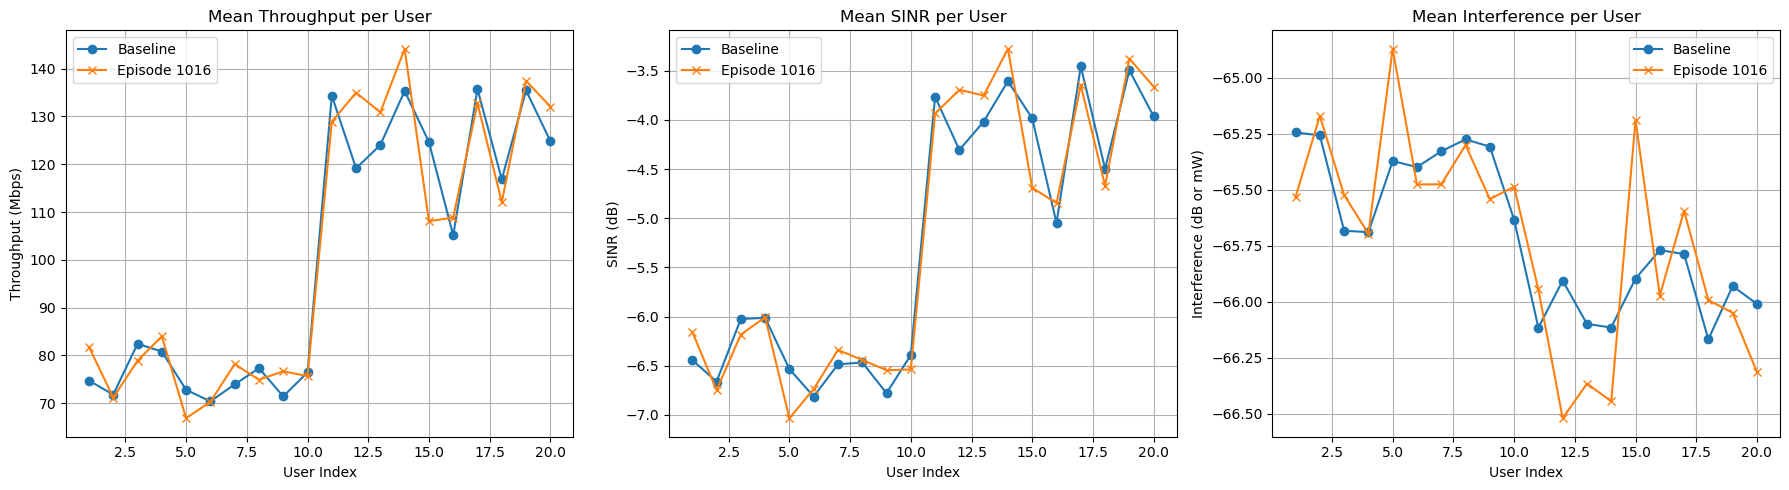

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

saved_folder = "saved_data"
num_episodes = 1016

best_mean_thrpt = -np.inf
episode_index = 1016

# Step 2: Load baseline data
Thrpt_baseline = np.load(f'{saved_folder}/Baseline_Thrpt.npy')     # (20, 61)
SINR_baseline = np.load(f'{saved_folder}/Baseline_SINR.npy')       # (20, 61)
Intf_baseline = np.load(f'{saved_folder}/Baseline_Intf.npy')       # (20, 61)

# Step 3: Load best episode data
Thrpt_best = np.load(f'{saved_folder}/Episode_{episode_index}_Thrpt.npy')
SINR_best = np.load(f'{saved_folder}/Episode_{episode_index}_SINR.npy')
Intf_best = np.load(f'{saved_folder}/Episode_{episode_index}_Intf.npy')

# Step 4: Compute mean across timesteps (axis=1) for each user
mean_thrpt_baseline = np.mean(Thrpt_baseline, axis=1)
mean_thrpt_best = np.mean(Thrpt_best, axis=1)

mean_sinr_baseline = np.mean(SINR_baseline, axis=1)
mean_sinr_best = np.mean(SINR_best, axis=1)

mean_intf_baseline = np.mean(Intf_baseline, axis=1)
mean_intf_best = np.mean(Intf_best, axis=1)


print(f"✅ Episode Index: {episode_index} with mean throughput (first 10 users): {np.mean(mean_thrpt_best[:10]):.4f} Mbps")

users = np.arange(1, 21)

# Step 5: Plot all three metrics
plt.figure(figsize=(18, 5))

# Plot Throughput
plt.subplot(1, 3, 1)
plt.plot(users, mean_thrpt_baseline, label='Baseline', marker='o')
plt.plot(users, mean_thrpt_best, label=f'Episode {episode_index}', marker='x')
plt.title('Mean Throughput per User')
plt.xlabel('User Index')
plt.ylabel('Throughput (Mbps)')
plt.legend()
plt.grid(True)

# Plot SINR
plt.subplot(1, 3, 2)
plt.plot(users, mean_sinr_baseline, label='Baseline', marker='o')
plt.plot(users, mean_sinr_best, label=f'Episode {episode_index}', marker='x')
plt.title('Mean SINR per User')
plt.xlabel('User Index')
plt.ylabel('SINR (dB)')
plt.legend()
plt.grid(True)

# Plot Interference
plt.subplot(1, 3, 3)
plt.plot(users, mean_intf_baseline, label='Baseline', marker='o')
plt.plot(users, mean_intf_best, label=f'Episode {episode_index}', marker='x')
plt.title('Mean Interference per User')
plt.xlabel('User Index')
plt.ylabel('Interference (dB or mW)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
